# Data Wrangling


### Import the libraries

We will be mostly using `pandas`.


In [1]:
import pandas as pd

### Load the file


In [2]:
data_frame = pd.read_csv("raw_data.csv")

## Null values


In [3]:
# Check for missing values
data_frame.isnull().sum()

time                   0
wmo                    0
name                   0
history_product        0
air_temp               0
apparent_t             9
dewpt                  0
rel_hum                0
delta_t                0
wind_dir_deg           9
wind_spd_kmh           9
gust_kmh              16
rain_trace           262
rain_ten              30
rain_hour             59
duration_from_9am    262
press                  3
lat                    0
lon                    0
location               0
dtype: int64

In [4]:
# Remove Null values
data_frame = data_frame.dropna()
data_frame.isnull().sum()

time                 0
wmo                  0
name                 0
history_product      0
air_temp             0
apparent_t           0
dewpt                0
rel_hum              0
delta_t              0
wind_dir_deg         0
wind_spd_kmh         0
gust_kmh             0
rain_trace           0
rain_ten             0
rain_hour            0
duration_from_9am    0
press                0
lat                  0
lon                  0
location             0
dtype: int64

## Duplicate Values


In [5]:
# Find duplicates
data_frame.duplicated().sum()

np.int64(0)

In [6]:
# Remove duplicates
data_frame = data_frame.drop_duplicates()
data_frame.duplicated().sum()

np.int64(0)

## Time Management


In [7]:
# Show time values
print(data_frame["time"])

0        2024-06-30T15:00:00+10:00
1        2025-02-08T23:00:00+11:00
2        2025-02-08T19:30:00+11:00
3        2025-02-09T02:00:00+11:00
4        2025-02-08T23:30:00+11:00
                   ...            
13642    2025-03-08T09:00:00+11:00
13643    2025-03-08T08:30:00+11:00
13644    2025-03-08T10:00:00+11:00
13645    2025-03-08T09:30:00+11:00
13646    2025-03-08T10:30:00+11:00
Name: time, Length: 13353, dtype: object


In [8]:
import datetime as dt

master_time = data_frame["time"]

for time1_value in master_time:
    time_value = dt.datetime.fromisoformat(time1_value)
    # print(time_value)
    # if timezone is +11:00
    if str(time_value.tzinfo) == "UTC+11:00":
        print(f"{time_value} \t Timezone is +11:00", end="\t")
        time_value = time_value.astimezone(dt.timezone(dt.timedelta(hours=10))) # convert to +10:00 timezone
        print(f"{time_value} \t Timezone is now +10:00")
    else:
        print(f"{time_value} \t Timezone is +10:00")

data_frame["time"] = master_time

2024-06-30 15:00:00+10:00 	 Timezone is +10:00
2025-02-08 23:00:00+11:00 	 Timezone is +11:00	2025-02-08 22:00:00+10:00 	 Timezone is now +10:00
2025-02-08 19:30:00+11:00 	 Timezone is +11:00	2025-02-08 18:30:00+10:00 	 Timezone is now +10:00
2025-02-09 02:00:00+11:00 	 Timezone is +11:00	2025-02-09 01:00:00+10:00 	 Timezone is now +10:00
2025-02-08 23:30:00+11:00 	 Timezone is +11:00	2025-02-08 22:30:00+10:00 	 Timezone is now +10:00
2025-02-09 02:30:00+11:00 	 Timezone is +11:00	2025-02-09 01:30:00+10:00 	 Timezone is now +10:00
2025-02-09 00:00:00+11:00 	 Timezone is +11:00	2025-02-08 23:00:00+10:00 	 Timezone is now +10:00
2024-06-30 18:00:00+10:00 	 Timezone is +10:00
2024-06-30 19:00:00+10:00 	 Timezone is +10:00
2025-02-09 03:30:00+11:00 	 Timezone is +11:00	2025-02-09 02:30:00+10:00 	 Timezone is now +10:00
2025-02-09 03:00:00+11:00 	 Timezone is +11:00	2025-02-09 02:00:00+10:00 	 Timezone is now +10:00
2024-06-30 20:00:00+10:00 	 Timezone is +10:00
2024-06-30 21:00:00+10:00 	 

Sorting time:

In [9]:
data_frame["time"] = data_frame["time"].apply(
    lambda value: int(dt.datetime.fromisoformat(value).timestamp())
)


print(data_frame["time"])

0        1719723600
1        1739016000
2        1739003400
3        1739026800
4        1739017800
            ...    
13642    1741384800
13643    1741383000
13644    1741388400
13645    1741386600
13646    1741390200
Name: time, Length: 13353, dtype: int64


In [10]:
# sort the data by time
data_frame = data_frame.sort_values(by="time")

## Removing Unneeded Columns

These columns do not change and will add further unnecessary data.


In [11]:
# Drop columns that are not needed
"""
Icluded columns:
- wmo
- name
- history_product
- lat
- lon
- location
"""

data_frame = data_frame.drop(
    columns=[
        "wmo",
        "name",
        "history_product",
        "lat",
        "lon",
        "location",
        "duration_from_9am",
    ]
)
print(data_frame)

             time  air_temp  apparent_t  dewpt  rel_hum  delta_t  \
4858   1715581800      19.3        16.1   15.2       77      2.4   
4859   1715583600      18.9        16.9   15.4       80      2.1   
2451   1715585400      18.7        16.7   15.0       79      2.2   
4861   1715587200      18.4        16.8   15.1       81      1.9   
4863   1715589000      18.0        16.7   14.7       81      1.9   
...           ...       ...         ...    ...      ...      ...   
13645  1741386600      25.0        23.2   18.7       68      4.0   
13644  1741388400      24.9        23.1   17.9       65      4.4   
13646  1741390200      25.4        22.3   17.6       62      4.9   
12506  1741392000      26.1        24.0   18.0       61      5.1   
13541  1741393800      25.9        22.0   17.0       58      5.5   

       wind_dir_deg  wind_spd_kmh  gust_kmh  rain_trace  rain_ten  rain_hour  \
4858          195.0          26.0      32.0         0.0       0.0        0.0   
4859          203.0    

## Scaling Features


In [12]:
feature = data_frame.columns
for feature in data_frame.columns:
    min = data_frame[feature].min()
    max = data_frame[feature].max()
    print(f"{feature:<15} | Min: {min:<10} | Max: {max:<10}")

time            | Min: 1715581800 | Max: 1741393800
air_temp        | Min: 5.6        | Max: 41.5      
apparent_t      | Min: -1.1       | Max: 39.5      
dewpt           | Min: -12.3      | Max: 24.1      
rel_hum         | Min: 7          | Max: 98        
delta_t         | Min: 0.2        | Max: 17.3      
wind_dir_deg    | Min: 0.0        | Max: 360.0     
wind_spd_kmh    | Min: 0.0        | Max: 70.0      
gust_kmh        | Min: 0.0        | Max: 93.0      
rain_trace      | Min: 0.0        | Max: 81.4      
rain_ten        | Min: 0.0        | Max: 6.2       
rain_hour       | Min: 0.0        | Max: 28.4      
press           | Min: 992.9      | Max: 1039.6    


In [13]:
# Normalise the data
feature = "apparent_t"

try:
    min = float(data_frame[feature].min())
    max = float(data_frame[feature].max())
except ValueError:
    print(f"Cannot normalise {feature}")
    exit()

data_frame[feature] = (data_frame[feature] - min) / (max - min)
print(data_frame[feature])


4858     0.423645
4859     0.443350
2451     0.438424
4861     0.440887
4863     0.438424
           ...   
13645    0.598522
13644    0.596059
13646    0.576355
12506    0.618227
13541    0.568966
Name: apparent_t, Length: 13353, dtype: float64


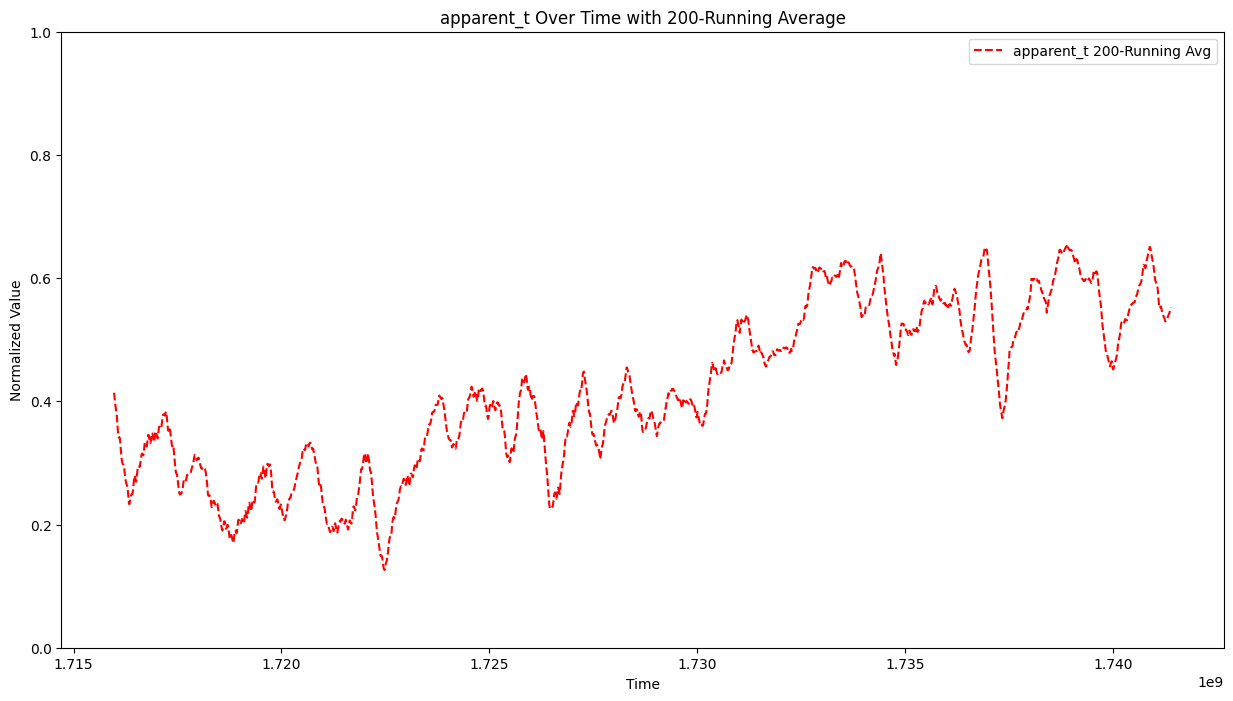

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
# plt.plot(
#     data_frame["time"],
#     data_frame[feature],
#     label=feature,
#     color="#2b75ff",
# )
plt.plot(
    data_frame["time"],
    data_frame[feature].rolling(window=200).mean(),
    label=f"{feature} 200-Running Avg",
    linestyle="--",
    color="red",
)
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.title(f"{feature} Over Time with 200-Running Average")
plt.ylim(0, 1)
plt.legend()
plt.show()